# CPSC 330 - Applied Machine Learning

## Homework 2: Decision trees and machine learning fundamentals
### Associated lectures: [Lectures 2 and 3](https://ubc-cs.github.io/cpsc330/README.html)

**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html)**.

Imports
------

In [55]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

<br><br>

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md).

You are welcome to broadly discuss questions with your classmates but your final answers must be your own. **We are not allowing group submission for this homework assignment.**  

**Important**: In this assignment we are using autograder so that you can get feedback on your solutions. For the autograder to work, you need to install `otter` in the course environment as follows.

Go to the command line/terminal, activate the course conda environment, and install otter-grader.

    ```
    conda activate cpsc330
    pip install otter-grader
    ```

The cell at the top of the notebook will throw an error if you do not install `otter-grader`.

<br><br>

## Introducing the data set

For this lab you'll be using Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/home) dataset. The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/).

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV.

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it under the `data` directory.

<br><br>

## Exercise 1: Exploratory data analysis

### 1.1 Loading the data
rubric={autograde:2}

**Your tasks:**

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column (index=0) of the .csv file should be set as the index.

<div class="alert alert-warning">

Solution_1.1
    
</div>

In [56]:
spotify_df = None
spotify_df= pd.read_csv('spotify.csv')
spotify_df.rename(columns={'Unnamed: 0':'index'}, inplace=True)
spotify_df.head()

,index,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


<br><br>

### 1.2 Number of training and test examples
rubric={autograde:2}

**Your tasks:**

Run the following line of code to split the data. How many training and test examples do we have? Store them in variables `n_train_samples` and `n_test_samples` below.  

> Note: we are setting the `random_state` so that everyone has the same split, which is required by the autograder.

In [57]:
train_df, test_df = train_test_split(spotify_df, test_size=0.2, random_state=321)

<div class="alert alert-warning">

Solution_1.2
    
</div>

In [58]:
# Please provide numeric values
n_train_samples = None
n_test_samples = None

n_train_samples=train_df.size
n_test_samples=test_df.size

In [59]:
n_train_samples

27421

In [60]:
n_test_samples

6868

In [10]:
grader.check("q1.2")

NameError: ignored

<br><br>

### 1.3 Preliminary EDA
rubric={autograde:3}

**Your tasks:**

1. Store the output of `describe()` **on the training split** in the variable `spotify_summary` below and print it out.
2. Store the feature with the smallest range as a string in `smallest_range_features` variable below.

> Hint: You can subtract the min value from the max value of the column to get the range.

> Note that `describe` returns another DataFrame.


<div class="alert alert-warning">

Solution_1.3
    
</div>

In [61]:
spotify_summary = None

spotify_summary=train_df.describe()

In [8]:
spotify_summary

,index,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1613.000000,1613.000000,1613.000000,1.613000e+03,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000
mean,998.950403,0.185067,0.620076,2.462533e+05,0.681315,0.134317,5.384377,0.191317,-7.095272,0.619343,0.092119,121.310311,3.975201,0.495891,0.512089
std,579.996434,0.255838,0.161152,8.056740e+04,0.206964,0.274217,3.653722,0.156071,3.678993,0.485699,0.088007,26.431574,0.247829,0.244267,0.500009
min,1.000000,0.000003,0.148000,1.604200e+04,0.015600,0.000000,0.000000,0.018800,-31.082000,0.000000,0.023100,47.859000,1.000000,0.037300,0.000000
25%,494.000000,0.010000,0.514000,1.999040e+05,0.564000,0.000000,2.000000,0.092200,-8.388000,0.000000,0.037500,100.221000,4.000000,0.298000,0.000000
50%,995.000000,0.062600,0.634000,2.298590e+05,0.712000,0.000088,6.000000,0.125000,-6.298000,1.000000,0.055300,121.241000,4.000000,0.492000,1.000000
75%,1500.000000,0.260000,0.739000,2.703330e+05,0.841000,0.055900,9.000000,0.250000,-4.833000,1.000000,0.107000,136.894000,4.000000,0.689000,1.000000
max,2016.000000,0.994000,0.984000,1.004627e+06,0.997000,0.976000,11.000000,0.969000,-0.718000,1.000000,0.622000,219.331000,5.000000,0.974000,1.000000


In [62]:
smallest_range_feature = None

spotify_range=spotify_summary.max()-spotify_summary.min()
print(spotify_range)
smallest_range_feature=spotify_range.idxmin()
smallest_range_feature


index               2.015000e+03
acousticness        1.613000e+03
danceability        1.612852e+03
duration_ms         1.003014e+06
energy              1.612984e+03
instrumentalness    1.613000e+03
key                 1.613000e+03
liveness            1.612981e+03
loudness            1.644082e+03
mode                1.613000e+03
speechiness         1.612977e+03
tempo               1.586568e+03
time_signature      1.612752e+03
valence             1.612963e+03
target              1.613000e+03
dtype: float64


'tempo'

In [ ]:
grader.check("q1.3")

<br><br>

<!-- BEGIN QUESTION -->

### 1.4 Plotting histograms
rubric={points:5}

The starter code below produces histograms for the `loudness` feature which shows the distribution of the feature values in the training set, separated for positive (target=1, i.e., user liked the song) and negative (target=0, i.e., user disliked the song) examples. There are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

> Note: I am using pandas plotting here. You can also use matplotlib if you wish.

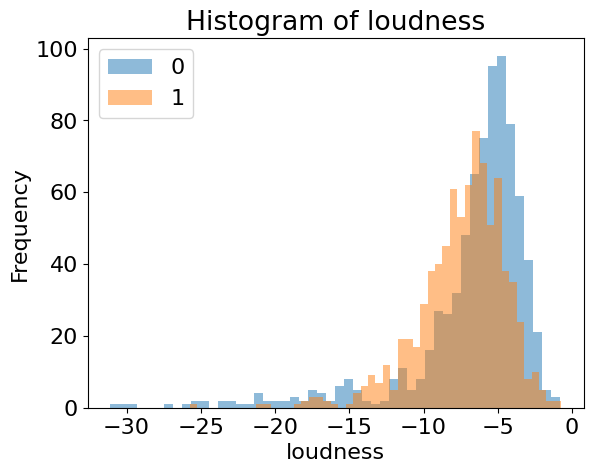

In [63]:
feat = "loudness"
ax = train_df.groupby("target")[feat].plot.hist(bins=50, alpha=0.5, legend=True)
plt.xlabel(feat)
plt.title("Histogram of " + feat)
plt.show()

**Your tasks:**

Create histograms for the following features in the order below.
- acousticness
- danceability
- tempo
- energy
- valence

> To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

<div class="alert alert-warning">

Solution_1.4
    
</div>

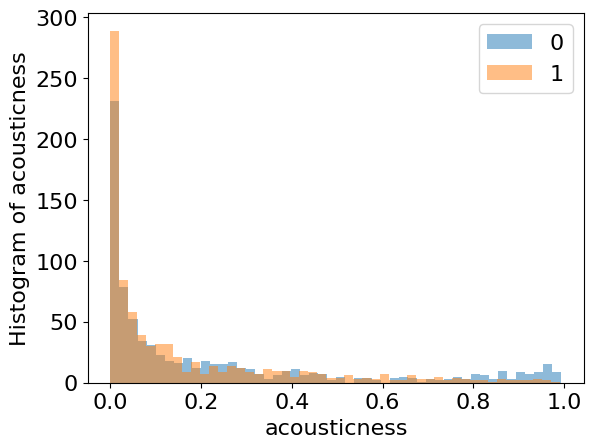

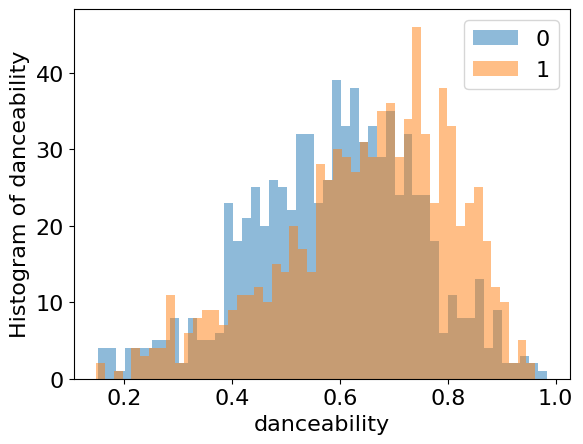

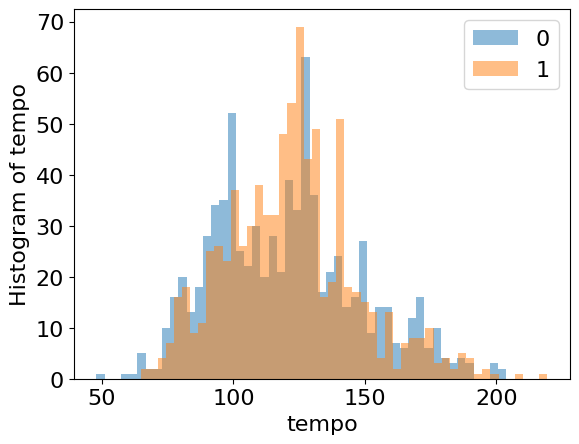

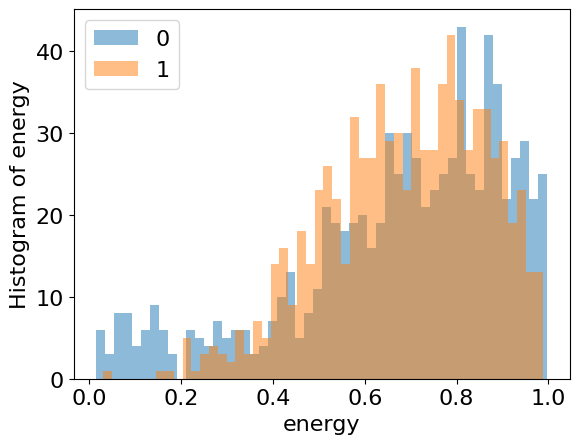

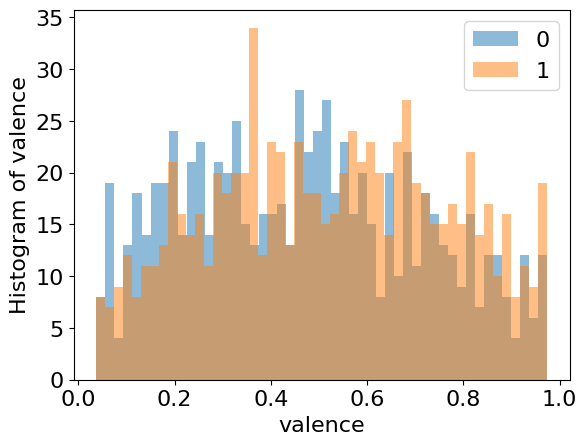

In [64]:
plot_feature=["acousticness","danceability","tempo","energy","valence"]
for pf in plot_feature:
  ax=train_df.groupby("target")[pf].plot.hist(bins=50, alpha=0.5, legend=True)
  plt.xlabel(pf)
  plt.ylabel("Histogram of "+pf)
  plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.5 Identical histograms
rubric={points:3}

**Your tasks:**

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?

<div class="alert alert-warning">

Solution_1.5
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.6 Which columns to include?
rubric={reasoning:4}

**Your tasks:**

Note that the dataset includes two free text features labeled `song_title` and `artist`. Do you think these features could be useful in predicting whether the user liked the song or not? Would there be any difficulty in using them in your model?   

<div class="alert alert-warning">

Solution_1.6
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

## Exercise 2: Using sklearn to build a decision tree classifier

<hr>
Recall that in machine learning what we care about is generalization; we want to build models that generalize well on unseen examples. One way to approximate generalization error is by splitting the data into train and test splits, building and tuning the model only using the train split, and carrying out the final assessment on the test split.

<br><br>

### 2.1 Creating `X` and `y`
rubric={autograde:2}

**Your tasks:**

1. Separate `X` and `y` from `train_df` and `test_df` and store them as `X_train`, `y_train`, `X_test`, `y_test`, respectively. Skip the `song_title` and `artist` columns for now.

<div class="alert alert-warning">

Solution_2.1
    
</div>

In [65]:
X_train = None
y_train = None
X_test = None
y_test = None

X_train=train_df.drop(columns=["target","song_title","artist"])
y_train=train_df['target']
y_train

260     1
1286    0
1344    0
1197    0
119     1
       ..
1833    0
799     1
124     1
538     1
1012    1
Name: target, Length: 1613, dtype: int64

In [66]:
X_test=test_df.drop(columns=["target","song_title","artist"])
y_test=test_df['target']

In [ ]:
grader.check("q2.1")

<br><br>

### 2.2
rubric={autograde:2}

**Your tasks:**

1. Create a `DecisionTreeClassifier` with `random_state=123` and store it in a variable called `spotify_tree`.
2. Fit the the decision tree classifier.

<div class="alert alert-warning">

Solution_2.2
    
</div>

In [67]:
spotify_tree = None

spotify_tree=DecisionTreeClassifier(random_state=123)
spotify_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

In [ ]:
grader.check("q2.2")

<br><br>

### 2.3
rubric={autograde:2}

**Your tasks:**

1. Use the `predict` method to predict the class of the first example in your `X_train` and store the prediction in a variable called `pred` and compare it with the "true" class from `y_train`.   

> Hint: you can grab the first example with `X_train.iloc[[0]]`.

<div class="alert alert-warning">

Solution_2.3
    
</div>

In [68]:
pred = spotify_tree.predict(X_train.iloc[[0]])
print(pred)
print(y_train.iloc[[0]])

[1]
260    1
Name: target, dtype: int64


In [ ]:
grader.check("q2.3")

<br><br>

### 2.4
rubric={autograde:2}

**Your tasks:**

1. Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. Store the mean cross-validation accuracy in a variable called `mean_cv_score`.  


<div class="alert alert-warning">

Solution_2.4
    
</div>

In [70]:
mean_cv_score = None
cv_score=cross_val_score(spotify_tree,X_train, y_train, cv=10)

print(cv_score)
mean_cv_score=np.mean(cv_score)
mean_cv_score

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


1.0

In [71]:
scores= cross_validate(spotify_tree, X_train, y_train, cv=10, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.007217,0.001804,1.0,1.0
1,0.003801,0.001383,1.0,1.0
2,0.003577,0.001532,1.0,1.0
3,0.003568,0.001392,1.0,1.0
4,0.003538,0.001583,1.0,1.0
5,0.003448,0.001275,1.0,1.0
6,0.003440,0.001348,1.0,1.0
7,0.003384,0.001315,1.0,1.0
8,0.003410,0.001420,1.0,1.0
9,0.003521,0.001292,1.0,1.0


In [ ]:
grader.check("q2.4")

<br><br>

### 2.5
rubric={autograde:3}

The above is useful, but we would like to see the training accuracy as well.

**Your tasks:**

1. Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True` and save the results in a variable called `scores_df` as a pandas dataframe.  

<div class="alert alert-warning">

Solution_2.5
    
</div>

In [17]:
scores_df = None

scores_df=cross_validate(spotify_tree, X_train, y_train, cv=10, return_train_score=True)
pd.DataFrame(scores_df)

,fit_time,score_time,test_score,train_score
0,0.011816,0.003419,1.0,1.0
1,0.004809,0.002123,1.0,1.0
2,0.004390,0.001681,1.0,1.0
3,0.004241,0.002203,1.0,1.0
4,0.004786,0.001720,1.0,1.0
5,0.004113,0.001660,1.0,1.0
6,0.004296,0.001666,1.0,1.0
7,0.004141,0.001633,1.0,1.0
8,0.004084,0.001704,1.0,1.0
9,0.004908,0.004177,1.0,1.0


In [ ]:
grader.check("q2.5")

<br><br>

<!-- BEGIN QUESTION -->

### 2.6
rubric={points:2}

**Your tasks:**
1. Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your mean cross-validation score?
2. Do you see a significant difference between the training scores and the cross-validation scores? Briefly discuss in 1 to 2 sentences.

<div class="alert alert-warning">

Solution_2.6
    
</div>

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br><br><br>

## Exercise 3: Hyperparameters

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

### 3.1
rubric={autograde:10}


**Your tasks:**

1. Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` given below.
2. For each `max_depth`, get both the mean train accuracy and the mean cross-validation accuracy.
3. Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which. Store the plot in a variable called `max_depth_plot` for autograding.


> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

In [47]:
spotify_df.head()

,index,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [53]:
X=spotify_df.drop(columns=["target"])
y = spotify_df["target"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state=123)
model=DecisionTreeClassifier(max_depth=4)
cross_v=cross_validate(model,X_train, y_train, cv=10, return_train_score=True)
pd.DataFrame(cross_v)

ValueError: ignored

In [51]:
depths = np.arange(1, 25, 2)
depths

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])

<div class="alert alert-warning">

Solution_3.1
    
</div>

In [52]:
# max_depth_plot: the figure plotted for this exercise
max_depth_plot = None
X_train.head()
result_dict={"mean_train_accuracy":[],"mean_cross_validate_accuracy":[]}
for max_d in depths:
   model=DecisionTreeClassifier(max_depth=max_d)
   cv= cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
   cv_score=pd.DataFrame(cv)
   train_score_accuracy=1-np.mean(cv_score["train_score"])
   cv_accuracy=1-np.mean(cv_score["test_score"])
   result_dict["mean_train_accuracy"].append(train_score_accuracy)
   result_dict["mean_cross_validate_accuracy"].append(cv_accuracy)
print(f"result_dict {result_dict}")

ValueError: ignored

In [46]:
X_train.head()

,index,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
260,260,0.01810,0.932,192773,0.819,0.000007,8,0.0577,-3.484,0,0.2030,119.941,4.0,0.552
1286,1286,0.08390,0.459,256933,0.561,0.000000,7,0.0998,-7.091,1,0.0271,144.784,4.0,0.298
1344,1344,0.00192,0.482,198947,0.968,0.000454,6,0.1080,-4.395,1,0.1490,114.001,4.0,0.245
1197,1197,0.03900,0.673,229507,0.758,0.000000,7,0.3410,-3.632,1,0.1580,135.956,4.0,0.541
119,119,0.02440,0.746,222093,0.873,0.000000,7,0.3540,-3.803,1,0.1280,148.075,4.0,0.808


In [ ]:
grader.check("q3.1")

<br><br>

<!-- BEGIN QUESTION -->

### 3.2 `max_depth` and the fundamental tradeoff
rubric={reasoning:2}

**Your tasks:**

Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy.

<div class="alert alert-warning">

Solution_3.2
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

### 3.3 Picking a reasonable value for `max_depth`
rubric={autograde:2}

**Your tasks:**

From these results, what value for max_depth would you pick as the optimal value? Store it in the variable called `best_max_depth` below.

<div class="alert alert-warning">

Solution_3.3
    
</div>

In [ ]:
best_max_depth = None

...

In [ ]:
grader.check("q3.3")

<br><br>

### 3.4 Final assessment on the test set
rubric={autograde:3}

Let's use the test set now (`X_test`, `y_test`) to examine if our cross-validation score from the previous exercise is trustworthy.

**Your tasks:**
1. Train a decision tree classifier using the optimal `max_depth` you chose in the previous exercise on the entire training set (`X_train`, `y_train`)
2. Compute the score on the test set (`X_test`, `y_test`) and store it in a variable called `test_score`.

<div class="alert alert-warning">

Solution_3.4
    
</div>

In [ ]:
test_score = None

...

In [ ]:
grader.check("q3.4")

<br><br>

<!-- BEGIN QUESTION -->

### 3.5 Analysis
rubric={points:5}

**Your tasks:**

1. How do the test scores compare to the cross-validation scores? Briefly discuss.
2. Why can't you simply pick the value of `max_depth` that gives the best accuracy on the training data? (Answer in maximum 2 to 3 sentences.)
3. Do you think that the max_depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

<div class="alert alert-warning">

Solution_3.5
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

## Exercise 4: Conceptual questions
rubric={points:3}

Consider the dataset below, which has $6$ examples and $2$ features:

$$X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

<div class="alert alert-warning">

Solution_4
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br><br><br>

## Submission instructions

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Make sure to access Gradescope via [Canvas](https://canvas.ubc.ca/courses/101888). Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.

Congratulations on working with your first machine learning model! Well done 👏👏!

![](https://github.com/IloraSen/cpsc330-2022W1/blob/master/hw/hw2/img/eva-well-done.png?raw=1)